In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor

In [2]:
# !pip install --upgrade scikit-learn

In [3]:
dataset=pd.read_csv('/content/drive/MyDrive/ML-Project/Project LR || WIP/Zomato dataset/Clean_data.csv')

In [4]:
dataset.head(5)

# i will droped some column

,Unnamed: 0,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weatherconditions,...,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken,Distance_km,time_diff_order_pickup,time_diff_order_pickup_minutes
0,0,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19 11:30:00,2022-03-19 11:45:00,Sunny,...,2,Snack,motorcycle,0,No,Urban,24,3.02,0 days 00:15:00,15
1,1,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25 19:45:00,2022-03-25 19:50:00,Stormy,...,2,Snack,scooter,1,No,Metropolitian,33,20.14,0 days 00:05:00,5
2,2,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19 08:30:00,2022-03-19 08:45:00,Sandstorms,...,0,Drinks,motorcycle,1,No,Urban,26,1.55,0 days 00:15:00,15
3,3,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05 18:00:00,2022-04-05 18:10:00,Sunny,...,0,Buffet,motorcycle,1,No,Metropolitian,21,7.77,0 days 00:10:00,10
4,4,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26 13:30:00,2022-03-26 13:45:00,Cloudy,...,1,Snack,scooter,1,No,Metropolitian,30,6.20,0 days 00:15:00,15


In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
dataset[dataset.select_dtypes(include='object').columns]

# need to delete some columns

#  Time_Orderd,Time_Order_picked,Unnamed: 0

dataset.drop(['Time_Orderd','Time_Order_picked','Unnamed: 0'],axis=1,inplace=True)

In [7]:
dataset.select_dtypes(include='int').columns

Index(['Delivery_person_Age', 'Vehicle_condition', 'multiple_deliveries',
       'Time_taken', 'time_diff_order_pickup_minutes'],
      dtype='object')

In [8]:
dataset.head(5)

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken,Distance_km,time_diff_order_pickup,time_diff_order_pickup_minutes
0,37,4.9,22.745049,75.892471,22.765049,75.912471,Sunny,High,2,Snack,motorcycle,0,No,Urban,24,3.02,0 days 00:15:00,15
1,34,4.5,12.913041,77.683237,13.043041,77.813237,Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33,20.14,0 days 00:05:00,5
2,23,4.4,12.914264,77.678400,12.924264,77.688400,Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26,1.55,0 days 00:15:00,15
3,38,4.7,11.003669,76.976494,11.053669,77.026494,Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21,7.77,0 days 00:10:00,10
4,32,4.6,12.972793,80.249982,13.012793,80.289982,Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30,6.20,0 days 00:15:00,15


In [9]:
input_var=dataset.drop(['Time_taken'],axis=1)
output_var=dataset['Time_taken']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(input_var, output_var, test_size=0.2, random_state=42)

# Columns transformer

In [11]:
# Weatherconditions- ordinal encoading
# Road_traffic_density- ordinal encoding
# Type_of_order - ordinal encoading
# Type_of_vehicle - ordinal encoading
# Festival - ordinal
# City - Label Encoding


c1 = ColumnTransformer(
    transformers=[
        ("t1", OrdinalEncoder(), [
            'Weatherconditions',
            'Road_traffic_density',
            'Type_of_order',
            'Type_of_vehicle',
            'Festival',
            'time_diff_order_pickup'
        ]),
        ("t2", StandardScaler(), [
            'Delivery_person_Age',
            'Delivery_person_Ratings',
            'Restaurant_latitude',
            'Restaurant_longitude',
            'Delivery_location_latitude',
            'Delivery_location_longitude',
            'Vehicle_condition',
            'multiple_deliveries',
            'Distance_km'
        ]),
        ("t3", OneHotEncoder(drop='first'), ['City'])
    ],
    remainder='passthrough'
)


In [12]:
rfr= RandomForestRegressor(n_estimators=200, random_state=1)

pipe=make_pipeline(c1,rfr)
pipe.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('t1', OrdinalEncoder(),
                                                  ['Weatherconditions',
                                                   'Road_traffic_density',
                                                   'Type_of_order',
                                                   'Type_of_vehicle',
                                                   'Festival',
                                                   'time_diff_order_pickup']),
                                                 ('t2', StandardScaler(),
                                                  ['Delivery_person_Age',
                                                   'Delivery_person_Ratings',
                                                   'Restaurant_latitude',
                                                   'Restaurant_longitude',
                                                   'Delivery_location_latitude',
                                                   'Delivery_location_longitude',
                                                   'Vehicle_condition',
                                                   'multiple_deliveries',
                                                   'Distance_km']),
                                                 ('t3',
                                                  OneHotEncoder(drop='first'),
                                                  ['City'])])),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=200, random_state=1))])

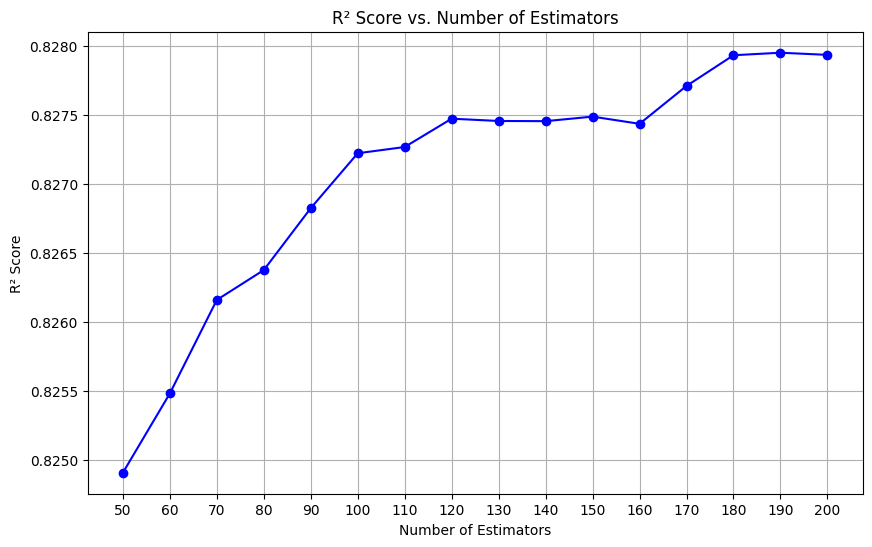

In [13]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
import numpy as np

# === CONFIGURATION ===
n_estimators_range = range(50, 201, 10)  # From 50 to 200 with a step of 10
r2_scores = []

# === MODEL TRAINING AND EVALUATION ===
for n_estimators_val in n_estimators_range:
    rfr = RandomForestRegressor(n_estimators=n_estimators_val, random_state=42)
    pipe = make_pipeline(c1, rfr)  # 'c1' should be your preprocessor or scaler
    pipe.fit(x_train, y_train)

    y_pred = pipe.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

# === PLOTTING ===
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, r2_scores, marker='o', linestyle='-', color='b')
plt.title('R² Score vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('R² Score')
plt.grid(True)
plt.xticks(n_estimators_range)
plt.show()


In [15]:
from sklearn.metrics import r2_score

y_pred=pipe.predict(x_test)

r2_score(y_test,y_pred)

0.8279370430017763

In [16]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)


MAE: 3.072589641434263


In [17]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)


MSE: 14.62875051407274


In [18]:
import numpy as np
rmse = np.sqrt(mse)
print("RMSE:", rmse)


RMSE: 3.8247549613109517


In [19]:
n = x_test.shape[0]  # number of samples
k = x_test.shape[1]  # number of predictors
adjusted_r2 = 1 - (1 - r2_score(y_test, y_pred)) * (n - 1) / (n - k - 1)
print("Adjusted R²:", adjusted_r2)


Adjusted R²: 0.8275602466255081


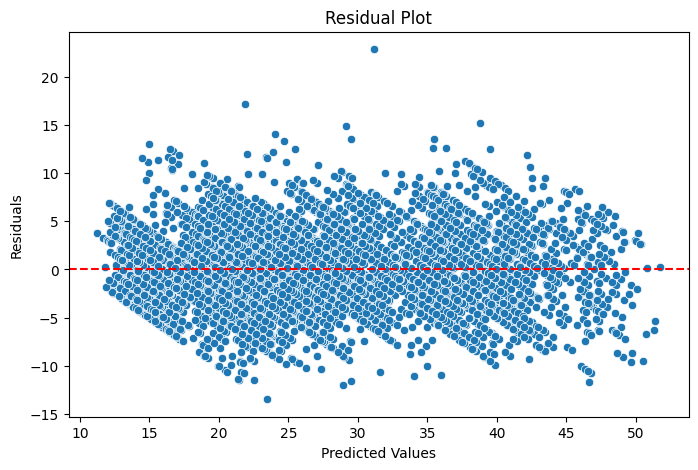

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


In [21]:
# So, I am ending this model with 82% accuracy.